In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pathlib import Path

In [213]:
# select the experiment for which you want to analyse data
EXPERIMENT_ID = 8

### Load Data

In [214]:
# set the paths
current_folder = globals()['_dh'][0]
results_path = os.path.join(current_folder,'results')
figures_path = os.path.join(current_folder,'plots')

# read the results data
df_data = pd.read_csv(os.path.join(results_path, f'experiment_{EXPERIMENT_ID}.csv'), index_col=0)
df_data_agents = pd.read_csv(os.path.join(results_path, f'agent_histories/experiment_{EXPERIMENT_ID}.csv'), index_col=0)

### Plot Offer and Transaction Prices

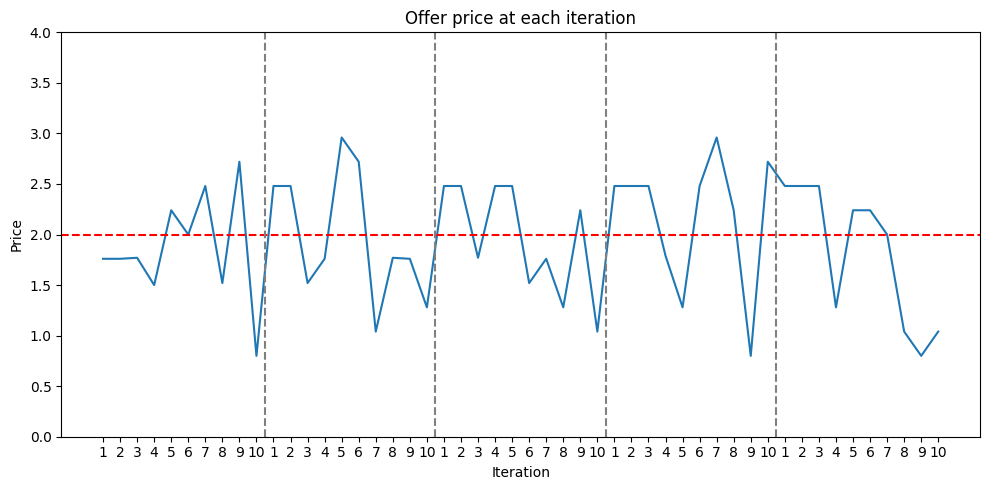

In [215]:
# plot the offer prices
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_data.index, y='price', markers='0', data=df_data)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_data.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_data.index, labels=df_data['iteration'], rotation=0)
plt.title('Offer price at each iteration')
plt.xlabel('Iteration')
plt.ylabel('Price')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

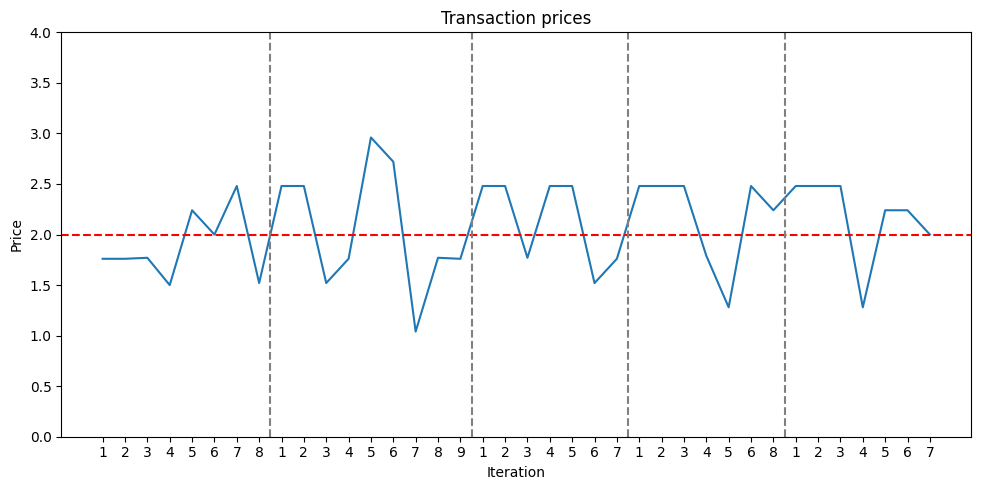

In [216]:
# plot the transaction prices
df_plot = df_data.loc[df_data['transaction']==True].reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='price', markers='x', 
                data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title('Transaction prices')
plt.xlabel('Iteration')
plt.ylabel('Price')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

In [217]:
# avearage prices per round
df = df_data.loc[df_data['transaction']==True].reset_index()
df.groupby('round')['price'].mean()

round
1    1.878750
2    2.054444
3    2.138571
4    2.175714
5    2.171429
Name: price, dtype: float64

In [218]:
# quantities sold per round
df = df_data.loc[df_data['transaction']==True].reset_index()
df.groupby('round')['transaction'].count()

round
1    8
2    9
3    7
4    7
5    7
Name: transaction, dtype: int64

In [219]:
# transaction price deviation from equilibrium price per round
df = df_data.loc[df_data['transaction']==True].reset_index()
df.groupby('round')['price'].std() / 2.0 * 100

round
1    17.101457
2    31.594215
3    21.680307
4    23.501520
5    21.593650
Name: price, dtype: float64

In [242]:
# transaction price deviation from equilibrium price per round
df = df_data.loc[df_data['transaction']==True].reset_index()
df.groupby('round')['price'].mean()

round
1    1.878750
2    2.054444
3    2.138571
4    2.175714
5    2.171429
Name: price, dtype: float64

### Analyse Profits

In [220]:
# calculate profits
df_data['announcer_profit'] = np.nan
df_data['responder_profit'] = np.nan
df_data['buyer_profit'] = np.nan
df_data['seller_profit'] = np.nan
# df_data.loc[df_data['transaction']==False, ['responding_agent_reservation_price', 'responding_agent_id']] = None
df_data.loc[df_data['announcement_type']=='sell', 'announcer_profit'] = df_data['price'] - df_data['announcing_agent_reservation_price']
df_data.loc[df_data['announcement_type']=='buy', 'announcer_profit'] = df_data['announcing_agent_reservation_price'] - df_data['price']
df_data.loc[df_data['announcement_type']=='sell', 'responder_profit'] = df_data['responding_agent_reservation_price'] - df_data['price']
df_data.loc[df_data['announcement_type']=='buy', 'responder_profit'] = df_data['price'] - df_data['responding_agent_reservation_price']

df_data.loc[df_data['announcement_type']=='buy', 'announcer_profit'] = df_data['announcing_agent_reservation_price'] - df_data['price']


# check whether no one violated the reservation price rule
df_data.loc[(df_data['announcer_profit']<0) | (df_data['responder_profit']<0)]

,round,iteration,price,announcement,transaction,announcement_type,announcing_agent_id,announcing_agent_reservation_price,responding_agent_id,responding_agent_reservation_price,announcer_profit,responder_profit,buyer_profit,seller_profit


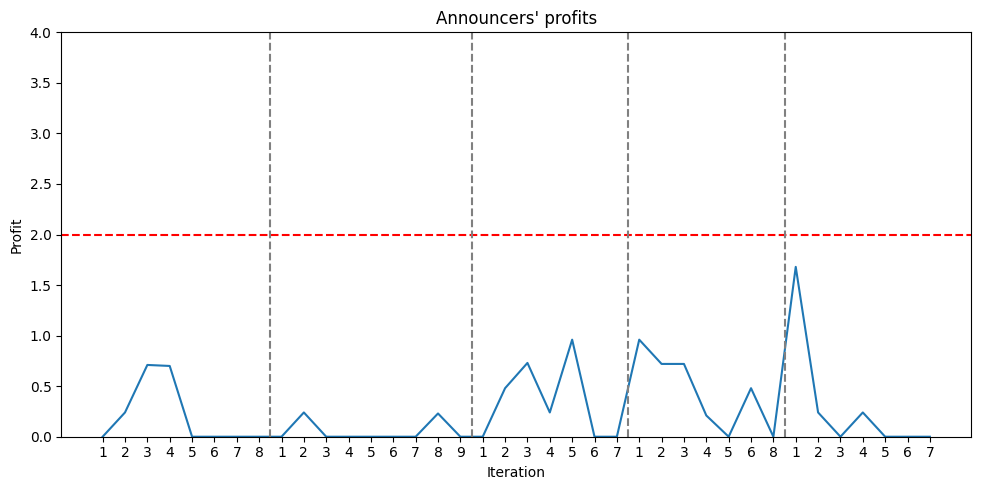

In [221]:
# plot the announcer profits
df_plot = df_data.loc[df_data['transaction']==True].reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='announcer_profit', markers='x', 
                data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title("Announcers' profits")
plt.xlabel('Iteration')
plt.ylabel('Profit')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

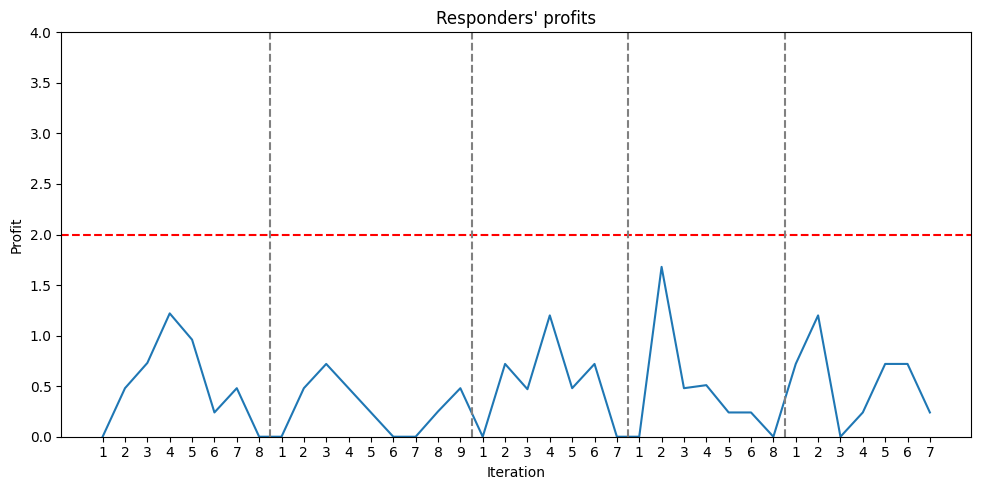

In [222]:
# plot the responder profits
df_plot = df_data.loc[df_data['transaction']==True].reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='responder_profit', markers='x', 
                data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title("Responders' profits")
plt.xlabel('Iteration')
plt.ylabel('Profit')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

### Analyse Announcements

In [223]:
zero_profit_share_announcers = len(df_data.loc[df_data['announcer_profit']==0])/len(df_data)
zero_profit_share_responders = len(df_data.loc[df_data['responder_profit']==0])/len(df_data)
average_profit_announcers = df_data['announcer_profit'].mean()
average_profit_responders = df_data['responder_profit'].mean()

print(f"Share of announcers whose profit is zero: {zero_profit_share_announcers:.2f}")
print(f"Share of responders whose profit is zero: {zero_profit_share_responders:.2f}")
print("\n")
print(f"Average profit for the announcers: ${average_profit_announcers:.2f}")
print(f"Average profit for the responders: ${average_profit_responders:.2f}")

Share of announcers whose profit is zero: 0.66
Share of responders whose profit is zero: 0.20


Average profit for the announcers: $0.20
Average profit for the responders: $0.46


In [224]:
zero_profit_share_announcers_buyers = len(df_data.loc[(df_data['announcer_profit']==0) & (df_data['announcement_type']=="buy")])/len(df_data)
zero_profit_share_announcers_sellers = len(df_data.loc[(df_data['announcer_profit']==0) & (df_data['announcement_type']=="sell")])/len(df_data)

print(f"Share of buy announcers whose profit is zero: {zero_profit_share_announcers_buyers:.2f}")
print(f"Share of sell announcers whose profit is zero: {zero_profit_share_announcers_sellers:.2f}")


Share of buy announcers whose profit is zero: 0.38
Share of sell announcers whose profit is zero: 0.28


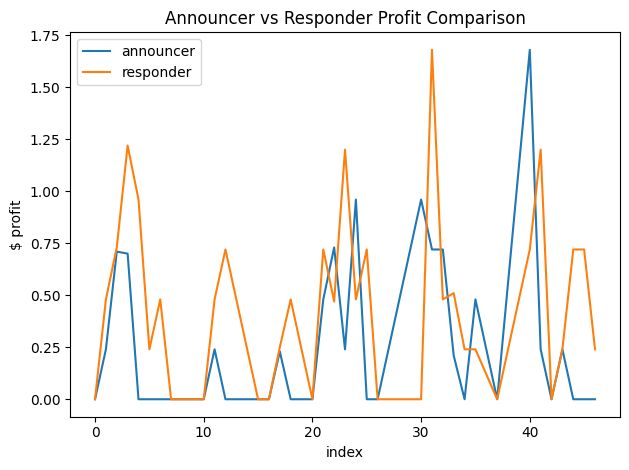

In [225]:
df = df_data.loc[df_data['transaction']==True]
plt.figure()
plt.plot(df.index, df['announcer_profit'], label=f'announcer')
plt.plot(df.index, df['responder_profit'], label=f'responder')
plt.title(f"Announcer vs Responder Profit Comparison")
plt.ylabel("$ profit")
plt.xlabel("index")
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_30380/2808244676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buyer_profit'] = np.nan
/tmp/ipykernel_30380/2808244676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_profit'] = np.nan


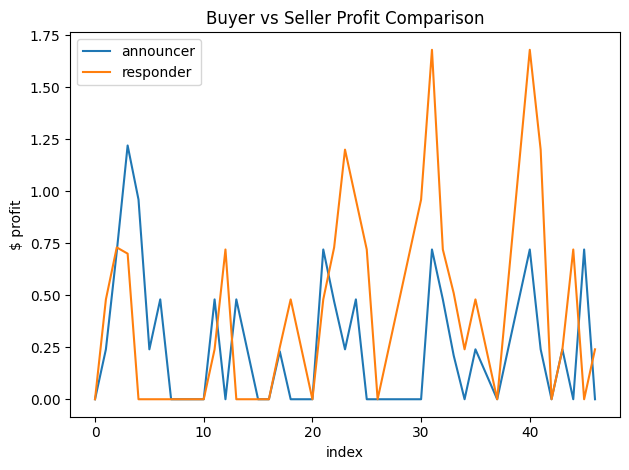

In [226]:
df = df_data.loc[df_data['transaction']==True]
df['buyer_profit'] = np.nan
df['seller_profit'] = np.nan
df.loc[df['announcement_type'] == 'buy', 'buyer_profit'] = df['announcer_profit']
df.loc[df['announcement_type'] == 'sell', 'buyer_profit'] = df['responder_profit']
df.loc[df['announcement_type'] == 'buy', 'seller_profit'] = df['responder_profit']
df.loc[df['announcement_type'] == 'sell', 'seller_profit'] = df['announcer_profit']

plt.figure()
plt.plot(df.index, df['buyer_profit'], label=f'announcer')
plt.plot(df.index, df['seller_profit'], label=f'responder')
plt.title(f"Buyer vs Seller Profit Comparison")
plt.ylabel("$ profit")
plt.xlabel("index")
plt.legend()
plt.tight_layout()
plt.show()

### Analyse Agents' Histories

In [227]:
# calculate profits
df_data_agents = df_data_agents.reset_index(drop=True)
df_data_agents['profit'] = np.nan
df_data_agents.loc[df_data_agents['type']=='Buyer', 'profit'] = df_data_agents['reservation_price'] - df_data_agents['price']
df_data_agents.loc[df_data_agents['type']=='Seller', 'profit'] = df_data_agents['price'] - df_data_agents['reservation_price']
df_data_agents

,round,iteration,action,price,outcome,id,reservation_price,type,profit
0,1,5,respond,2.24,rejected,0,0.8,Buyer,-1.44
1,1,6,announce,0.80,rejected,0,0.8,Buyer,0.00
2,1,6,respond,2.00,rejected,0,0.8,Buyer,-1.20
3,1,7,respond,3.20,rejected,0,0.8,Buyer,-2.40
4,1,7,respond,2.48,rejected,0,0.8,Buyer,-1.68
...,...,...,...,...,...,...,...,...,...
818,5,10,respond,1.28,rejected,10,3.2,Seller,-1.92
819,5,10,announce,3.20,rejected,10,3.2,Seller,0.00
820,5,10,respond,0.80,rejected,10,3.2,Seller,-2.40
821,5,10,respond,1.76,rejected,10,3.2,Seller,-1.44


In [228]:
df_data_agents['counter'] = df_data_agents.groupby(['type', 'id']).cumcount()

In [229]:
df_data_agents

,round,iteration,action,price,outcome,id,reservation_price,type,profit,counter
0,1,5,respond,2.24,rejected,0,0.8,Buyer,-1.44,0
1,1,6,announce,0.80,rejected,0,0.8,Buyer,0.00,1
2,1,6,respond,2.00,rejected,0,0.8,Buyer,-1.20,2
3,1,7,respond,3.20,rejected,0,0.8,Buyer,-2.40,3
4,1,7,respond,2.48,rejected,0,0.8,Buyer,-1.68,4
...,...,...,...,...,...,...,...,...,...,...
818,5,10,respond,1.28,rejected,10,3.2,Seller,-1.92,82
819,5,10,announce,3.20,rejected,10,3.2,Seller,0.00,83
820,5,10,respond,0.80,rejected,10,3.2,Seller,-2.40,84
821,5,10,respond,1.76,rejected,10,3.2,Seller,-1.44,85


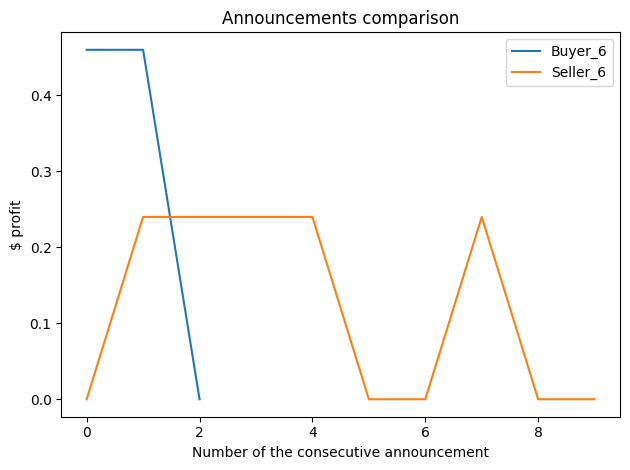

In [230]:
d_announcements = {}
for agent_id in range(0,11):
    for agent_type in ['Buyer', 'Seller']:
        df = df_data_agents.loc[
            (df_data_agents['id']==agent_id) & 
            (df_data_agents['type']==agent_type) & 
            (df_data_agents['action']=='announce')]
        df.loc[:, 'counter'] = df.groupby(['type', 'id']).cumcount()
        d_announcements[f'{agent_type}_{agent_id}'] = df


agent_id = 6
plt.figure()
plt.plot(d_announcements[f'Buyer_{agent_id}']['counter'], d_announcements[f'Buyer_{agent_id}']['profit'], label=f'Buyer_{agent_id}')
plt.plot(d_announcements[f'Seller_{agent_id}']['counter'], d_announcements[f'Seller_{agent_id}']['profit'], label=f'Seller_{agent_id}')
plt.title(f"Announcements comparison")
plt.ylabel("$ profit")
plt.xlabel("Number of the consecutive announcement")
plt.legend()
plt.tight_layout()
plt.show()


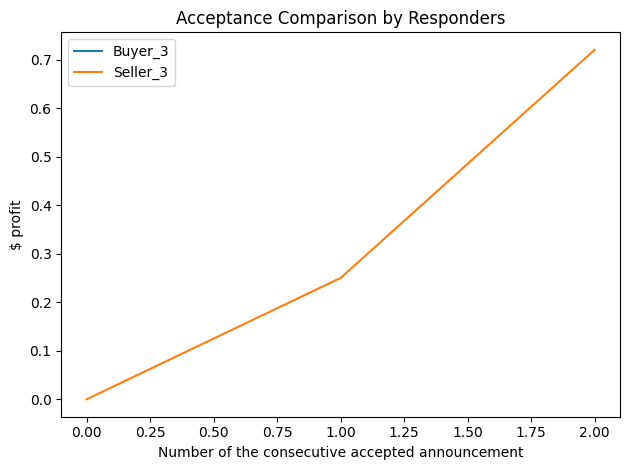

In [231]:
d_announcements = {}
for agent_id in range(0,11):
    for agent_type in ['Buyer', 'Seller']:
        df = df_data_agents.loc[
            (df_data_agents['id']==agent_id) & 
            (df_data_agents['type']==agent_type) & 
            (df_data_agents['action']=='respond') & 
            (df_data_agents['outcome']=='accepted')]
        df.loc[:, 'counter'] = df.groupby(['type', 'id']).cumcount()
        d_announcements[f'{agent_type}_{agent_id}'] = df


agent_id = 3
plt.figure()
plt.plot(d_announcements[f'Buyer_{agent_id}']['counter'], d_announcements[f'Buyer_{agent_id}']['profit'], label=f'Buyer_{agent_id}')
plt.plot(d_announcements[f'Seller_{agent_id}']['counter'], d_announcements[f'Seller_{agent_id}']['profit'], label=f'Seller_{agent_id}')
plt.title(f"Acceptance Comparison by Responders")
plt.ylabel("$ profit")
plt.xlabel("Number of the consecutive accepted announcement")
plt.legend()
plt.tight_layout()
plt.show()
